In [7]:
import pandas as pd
import pickle
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
from scipy.stats import mstats
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess
import numpy as np
import seaborn as sns

init_notebook_mode(connected=True)

In [34]:
florida = pickle.load(open("../data/florida.pkl", "rb"))
alberta = pickle.load(open("../data/alberta.pkl", "rb"))

frames = [florida, alberta]

data = pd.concat(frames)

# cols = ['Microcystin (ug/L)', 'Total Nitrogen (ug/L)', 'Total Phosphorus (ug/L)', 'Secchi Depth (m)', 'Total Chlorophyll (ug/L)', 'Temperature (degrees celsius)']
cols = ['Microcystin (ug/L)', 'Total Nitrogen (ug/L)']

alberta['YearSeason'] = pd.to_datetime(alberta['DATETIME']).map(lambda dt: dt.replace(day=1)).map(lambda dt: dt.replace(month=3*((dt.month%12 + 3)//3)-2))
alberta['YearMonth'] = pd.to_datetime(alberta['DATETIME']).map(lambda dt: dt.replace(day=1))
florida['YearSeason'] = pd.to_datetime(florida['DATETIME']).map(lambda dt: dt.replace(day=1)).map(lambda dt: dt.replace(month=3*((dt.month%12 + 3)//3)-2))
florida['YearMonth'] = pd.to_datetime(florida['DATETIME']).map(lambda dt: dt.replace(day=1))

/home/samfeng/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




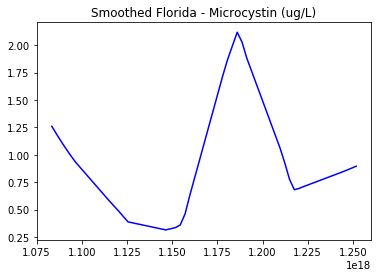

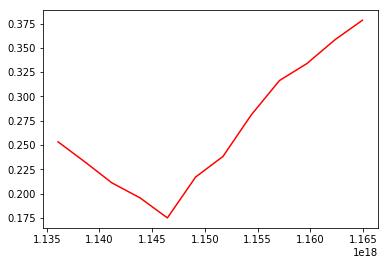

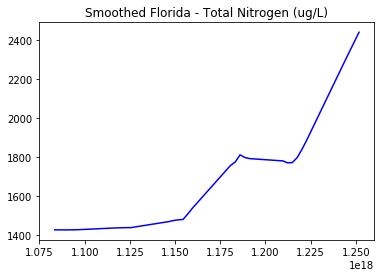

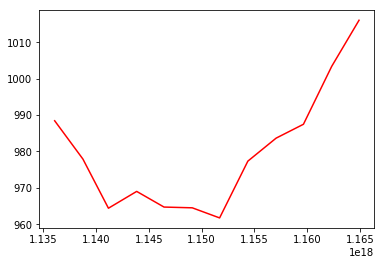

In [36]:
for c in cols:
    # strip values more than 3 standard deviations away, monthly data
    alberta_2 = alberta[((alberta[c] - alberta[c].mean()) / alberta[c].std()).abs() < 3]
    florida_2 = florida[((florida[c] - florida[c].mean()) / florida[c].std()).abs() < 3]
    
    alberta_x=alberta_2['YearMonth']
    alberta_y=alberta_2[c]

    florida_x=florida_2['YearMonth']
    florida_y=florida_2[c]

    alb_smooth = lowess(alberta_y, alberta_x, frac=0.5, it=0)
    flor_smooth = lowess(florida_y, florida_x, frac=0.5, it=0)
    #print(lowess(alberta_y, alberta_x)[:,1])
    #print(alb_smooth[:,1])
    
    #plt.plot(alb_smooth[:,0], alb_smooth[:,1], 'b')
    #plt.plot(flor_smooth[:,0], flor_smooth[:,1], 'r')
    
    fig1, ax1 = plt.subplots()
    ax1.plot(alb_smooth[:,0], alb_smooth[:,1], 'b')
    ax1.set_title(f'Smoothed Alberta - {c}')
    
    fig2, ax2 = plt.subplots()
    ax2.plot(flor_smooth[:,0], flor_smooth[:,1], 'r')
    ax1.set_title(f'Smoothed Florida - {c}')
    
    #sns.scatterplot(alberta_x, alberta_y)
    #plt.show()
    
    layout = go.Layout(
        title= f'{c} vs Date - 3 SD, Monthly', 
        xaxis={'title':'Date'}, 
        yaxis={'title': c}
    )
    
    a = go.Scatter(
        x=alberta_x,
        y=alberta_y,
        mode='markers',
        marker={
       'opacity': 0.6,
        },
        name='Alberta'
    )

    f = go.Scatter(
        x=florida_x,
        y=florida_y,
        mode='markers',
        marker={
       'opacity': 0.6,
        },
        name='Florida'
    )

    fig = {
        'data': [f, a],
        'layout': layout
    }

    iplot(fig)